<a href="https://colab.research.google.com/github/Rogerio-mack/Visualizacao-de-Dados-em-Python/blob/main/c6_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relações**
<hr>


Muitos conjuntos de dados contêm duas ou mais variáveis, e podemos estar interessados ​​em como essas variáveis ​​se relacionam entre si. 
De certo modo muitos dos gráficos que estudamos nos capítulos anteriores podem ser usados e ajudam nessa análise. 

Gráficos de linha, ajudam a entender a evolução de uma variável com relação a outra, e no mesmo capítulo vimos o uso dos gráficos de pontos ou dispersão. Gráficos de caixa também podem ser utilizados para representar a distribuição de uma variável com relação a diferentes valores de uma outra variável, e podemos empregar gráficos de barra ou gráficos emparelhados para apresentar valores com relação a outras quantidades. A divisão entre gráficos para representar Evolução, Distribuição, Quantidades e Proporções e, agora, Relações, ajuda a organizar a análise indicando os gráficos mais comuns para cada propósito, mas os gráficos em geral permitem exibir múltiplos aspectos dos dados.

Os gráficos de dispersão, que vimos no capítulo Evolução, são talvez o tipo mais empregado para análise de relações entre duas variáveis quantitativas, e você deve notar que muitos dos gráficos anteriores em que representamos relações dos dados tratam de relações entre uma variável quantitativa e categorias apenas. Aqui vamos explorar um pouco mais esse gráfico fazendo representações multidimensionais, empregando cores e diferentes tamanhos dos pontos de dados (gráfico de Bolhas) para representar novas dimensões em um gráfico 2D. 

O principal problema no uso de gráficos de dispersão é a criação de gráficos com *overplotting*. Um excesso de dados no gráfico em geral não permite identificarmos as relações e, no final, o objetivo da visualização é completamente prejudicado. Correlogramas são gráficos de dispersão de diferentes pares de variáveis, dividindo a visualização das relações em  relações menores, mais fáceis de analisar individualmente. Trataremos também desses gráficos aqui. Por último, teremos os mapas de calor que podem ser empregados para visualizar uma matriz de correlação com dados multivariados.



## Gráficos de Dispersão, *Scatter plots*

Basicamente os gráficos de dispersão, gráfico de pontos ou diagramas de dispersão, apresentam duas variáveis quantitativas, uma para cada eixo, para exibir e ajudar a identificar alguma relação ou correlação nos dados.

A partir dos padrões exibidos você pode, por exemplo, identificar uma correlação positiva entre as variáveis (os valores aumentam em conjunto) ou negativa (um valor diminui à medida que os outros aumentam), pode identificar uma relação linear, ou ainda  um padrão exponencial ou polinomial (por exemplo, a forma de U para polinômios de segundo grau). A força da correlação é expressa pela proximidade (concentração) dos pontos em torno do padrão e dados mais fora do agrupamento indicam a dispersão do padrão e possíveis *outliers*. É também comum, quando identificado esse padrão, adicionarmos uma linha de ajuste ou linha de tendência para inferência de valores, o que pode ser feito por métodos de aproximação, como regressão linear e outras formas de interpolação que empregamos antes no capítulo Evolução.

Um caso especial de relação e de muito interesse são as relações lineares. Correlação é o termo que deve ser empregado para relações lineares entre os dados. O coeficiente de correlação é um número entre $[-1,1]$ e é uma medida da relação linear entre duas variáveis onde, $1$ expressa uma relação linear positiva perfeita, $-1$ uma relação linear negativa perfeita e $0$ a ausência de uma relação linear. Identificada uma relação linear é comum aproximarmos os dados por uma regressão e representar a reta obtida no gráfico.

Mas os dados podem exibir muitas outras relações e podemos encontrar relações que são aproximadas por funções exponenciais, polinomiais etc. Um erro bastante comum é considerar que um coeficiente de correlação 0 indica *ausência* de relações entre os dados. O coeficiente de correlação 0 indica apenas a *ausência* de relações lineares entre os dados!

$\rightarrow$ *Um erro bastante comum é considerar que um coeficiente de correlação $0$ indica a ausência de relações entre os dados. O coeficiente de correlação $0$ indica apenas a ausência de relações lineares entre os dados, não de outras relações!*

 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

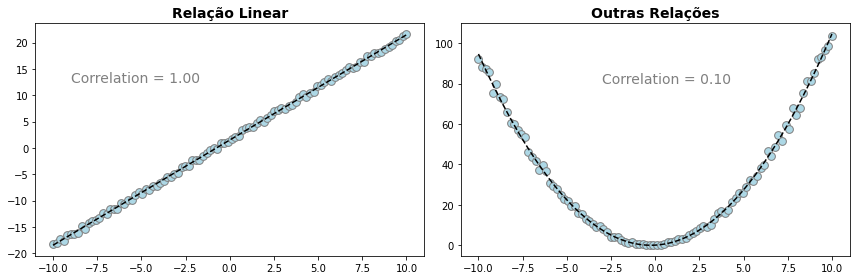

In [ ]:
plt.figure(figsize=(12,4))
np.random.seed(99)
x = np.linspace(-10, 10, 100)
y1 = 2*(x + np.random.rand(len(x))*0.5) + 1
y2 = (x + np.random.rand(len(x))*0.5)**2

plt.subplot(1,2,1)
plt.scatter(x,y1, color='lightblue', s=60, edgecolors='grey')
z = np.polyfit(x, y1, 1)
p = np.poly1d(z)
plt.plot(x,p(x),color='k', linestyle='dashed')
plt.title('Relação Linear', fontsize=14, weight='bold')
plt.text(-9,12.5,f'Correlation = {np.corrcoef(x,y1)[0,1]:.2f}',fontsize=14, color='grey')

plt.subplot(1,2,2)
plt.scatter(x,y2, color='lightblue', s=60, edgecolors='grey')
z = np.polyfit(x, y2, 2)
p = np.poly1d(z)
plt.plot(x,p(x),color='k', linestyle='dashed')
plt.title('Outras Relações', fontsize=14, weight='bold')
plt.text(-3,80,f'Correlation = {np.corrcoef(x,y2)[0,1]:.2f}',fontsize=14, color='grey')

plt.tight_layout()
plt.show()

O primeiro conjunto de dados acima apresenta uma correlação positiva quase perfeita (valor muito próximo de $1$), enquanto o segundo uma correlação muito baixa ($0.1$). Apesar disso os dados têm uma relação bastante direta dos valores ($y = x^2$).

Um outro alerta importante sobre relações refere-se a como interpretamos essas relações e dois outros erros são bastante comuns. 

$\rightarrow$  *O primeiro erro é interpretarmos a presença de uma relação como uma relação de causa-efeito entre as variáveis. Duas variáveis, entretanto, podem estar **relacionadas** e serem determinadas por outros fatores, por uma ou outras variáveis,  não representadas e que talvez você desconheça. Assim, mesmo havendo uma relação entre duas variáveis, uma variável não necessariamente **determina** a outra como numa relação causa-efeito.* 

$\rightarrow$  *O segundo erro é considerarmos que se não encontramos relações na análise bivariada (duas variáveis) elas não têm então qualquer relação. Assumir isso, entretanto, é desconsiderar a existência de relações conjuntas (uma outra variável que, em conjunto, potencializa a relação) que são mais difíceis de serem analisadas.*

## Um Gráfico de Dispersão Simples 



Gráficos de dispersão podem ser facilmente produzidos com a função `plt.scatter(x,y)` do `Matplotlib` indicando-se apenas as variáveis `x`e `y` de interesse. 

Vamos empregar o data-set `gapminder` para explorar algumas relações entre os dados de desenvolvimento de diferentes países.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/gapminder_2015.csv')
df['cod_continent'] = df[['continent']].astype('category').apply(lambda x: x.cat.codes)
df.head()

continent        country  year  ...   CPI  Population  cod_continent
0    Africa       Botswana  2015  ...  63.0     2120000              0
1    Africa   Burkina Faso  2015  ...  38.0    18100000              0
2    Africa  Cote d'Ivoire  2015  ...  32.0    23200000              0
3    Africa          Egypt  2015  ...  36.0    92400000              0
4    Africa          Kenya  2015  ...  25.0    47900000              0

[5 rows x 17 columns]

O gráfico abaixo mostra o gráfico de pontos para os valores de renda anual por habitante e expectativa de vida, variáveis para as quais esperamos alguma relação. O gráfico pode ser obtido diretamente apenas informando as variáveis envolvidas:

```
plt.scatter(df['income_per_person'],df['LifeExpect']))
```


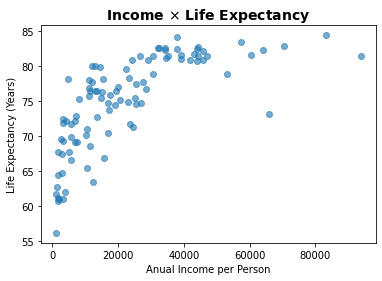

In [ ]:
plt.scatter(df['income_per_person'],df['LifeExpect'] , alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.show()



Essa é uma representação muito simples e, em geral, queremos explorar essa relação em outras dimensões adicionando à visualização diferentes categorias ou classes de valores. Para isso podemos  empregar cores ou diferentes tamanhos dos pontos para adicionar novas dimensões aos dados. 

Isso pode ser feito com o `Matplotlib`. Com ele você terá total controle sobre a representação dos dados. Para análises multidimensionais, entretanto, o pacote `Seaborn` em geral oferecerá uma interface mais simples.

### Adicionando Dimensões com Cores

Já empregamos esquemas de cores antes mas eles tinham um propósito mais ornamental na construção dos gráficos. Agora vamos empregar esquemas de cores para representar valores dos dados e permitir representações multidimensionais em um mesmo gráfico 2D. É essencial então entendermos claramente como atibuir esses valores. 

Existem muitas formas de se fazer isso e apresentamos aqui uma forma que parece bastante útil e flexível, e que pode ser empregada em muitos casos. A ideia é criar um dicionário mapeando os valores às cores desejadas. Para as diferentes cores podemos usar os rótulos já conhecidos 'r','g,'b' etc. ou ainda 'red', 'lightblue', 'yellow' etc., mas também podemos empregar os esquemas de cores do `Matplotlib` ou do `Seaborn` que fornecem espectros de cores mais elaborados. Abaixo mostramos como empregar esses 3 esquemas de cores. No exemplo, nós  associamos diferentes cores a cada continente do nosso dataset com dados de desenvolvimento dos países e, assim, adicionamos mais essa dimensão à representação dos dados.

#### Esquema de cores 1

Empregando as cores básicas.

In [ ]:
dict(zip(df.continent.unique(), ['r','g','b','c','m']))

{'Africa': 'r', 'Americas': 'g', 'Asia': 'b', 'Europe': 'c', 'Oceania': 'm'}

#### Esquema de cores 2

Empregando o esquema de cores do `Matplotlib`.

In [ ]:
from matplotlib import cm
dict(zip(df.continent.unique(), cm.viridis(len( df.continent.unique() )) ) )

{'Africa': 0.273809, 'Americas': 0.031497, 'Asia': 0.358853, 'Europe': 1.0}

#### Esquema de cores 3

Empregando o esquema de cores do `Seaborn`.

In [ ]:
sns.color_palette("Set2", len(df.continent.unique()))

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)]

In [ ]:
dict(zip(df.continent.unique(), sns.color_palette("Set2", len(df.continent.unique()))))

{'Africa': (0.4, 0.7607843137254902, 0.6470588235294118),
 'Americas': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 'Asia': (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 'Europe': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 'Oceania': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)}

Esses dicionários são, então, empregados para *mapear* cada valor de `continent` com o método `map`.  

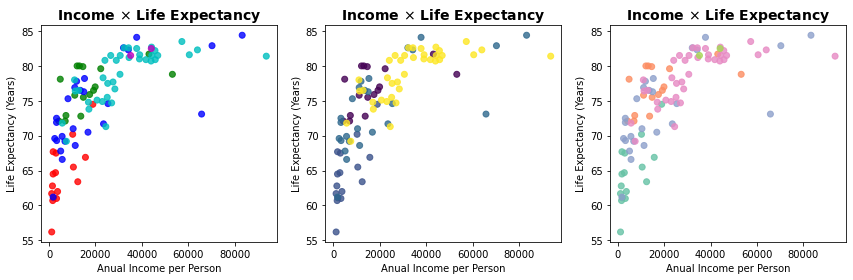

In [ ]:
plt.figure(figsize=(12,4))

colors1 = dict(zip(df.continent.unique(), ['r','g','b','c','m']))
colors2 = dict(zip(df.continent.unique(), cm.viridis(len( df.continent.unique() )) ) )
colors3 = dict(zip(df.continent.unique(), sns.color_palette("Set2", len(df.continent.unique()))))

colors = [ colors1, colors2, colors3 ]

for i in range(len(colors)):
  plt.subplot(1,3,i+1)
  plt.scatter(df['income_per_person'], df['LifeExpect'], alpha=0.8, 
              c = df['continent'].map(colors[i]))

  plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
  plt.xlabel('Anual Income per Person')
  plt.ylabel('Life Expectancy (Years)')

plt.tight_layout()
plt.show()


Mas, independente do esquema que você escolher, será inútil empregar diferentes cores se você não puder associar para cada cor os valores que elas representam. Você pode fazer isso com o uso de legendas. 

Com o `Matplotlib` a forma mais simples de fazer isso é adicionando camadas de plot dos gráficos para cada dimensão desejada. A cada plot pode ser associado um label que é, então, exibido na legenda ao final. Isso está primeiro gráfico abaixo onde o laço de programa (`for`) percorre cada um dos valores da dimensão `continent` para adicionar uma nova camada de pontos com essa dimensão dos dados no gráfico. Cada nova camada recebe uma cor e um rótulo diferente para representar essa nova dimensão dos dados que são exibidos ao final na legenda. Essa forma de construção é a mais simples.

O mesmo gráfico pode ser também construído sem uso de iterações. Podemos *plotar* todos os pontos indicando um array de cores para cada ponto como fizemos antes. Essa opção, entretanto, torna a adição de legendas um pouco mais complexa sendo necessário editar a legenda em separado. A construção desse modo encontra-se no segundo gráfico representado abaixo.

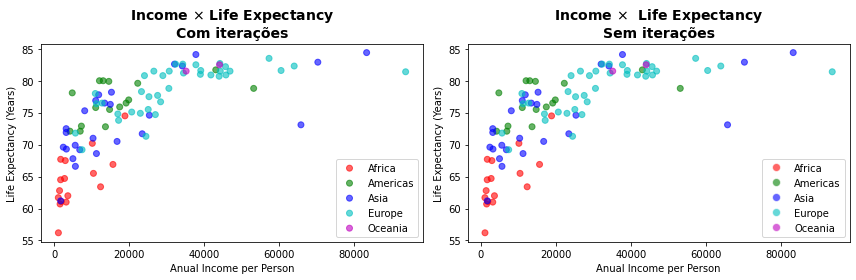

In [ ]:
plt.figure(figsize=(12, 4))
colors1 = dict(zip(df.continent.unique(), ['r','g','b','c','m']))

plt.subplot(1,2,1)
for continent in df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'], 
              df[ df['continent'] == continent ]['LifeExpect'] , 
              c=df[ df['continent'] == continent ]['continent'].map(colors1), 
              label=continent,
              alpha=0.6)

plt.title('Income $\\times$ Life Expectancy\nCom iterações', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend()

plt.subplot(1,2,2)
plt.scatter(df['income_per_person'], 
            df['LifeExpect'] ,
            c=df['continent'].map(colors1),
            alpha=0.6)

plt.title('Income $\\times$  Life Expectancy\nSem iterações', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

# Adicionando a legenda
from matplotlib.lines import Line2D
legends = []
for color in colors1.values():
  legends.append( Line2D([0], [0], markerfacecolor=color, marker='o', markersize=8, color='w', alpha=0.6) )

plt.legend(legends, df['continent'].unique())

plt.tight_layout()
plt.show()



Uma alternativa prática pode ser empregar o gráfico sem iterações para obter a figura desejada e, sobre ela, produzir gráficos vazios por meio de iterações adicionando a legenda. Mas é esse um 'truque' de programação que não vamos apresentar aqui, embora empreguemos algo semelhante mais adiante para inibir as legendas automáticas do `Seaborn` que você poderá empregar como modelo. 



### `Seaborn`, `hue`

O `Seaborn`, sendo mais voltado para análises multidimensionais, já fornece um parâmetro direto para adição de dimensões de classes de dados aos gráficos de pontos e pode ser uma boa alternativa. O parâmetro `hue` indica o atributo da classe de valores e pode ser empregado em muitos outros gráficos do `Seaborn`.  

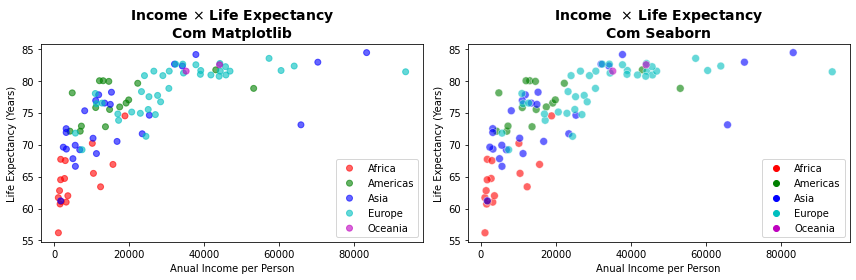

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
for continent in df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'], 
              df[ df['continent'] == continent ]['LifeExpect'] , 
              c=df[ df['continent'] == continent ]['continent'].map(colors1), 
              label=continent,
              alpha=0.6)

plt.title('Income $\\times$ Life Expectancy\nCom Matplotlib', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend()

plt.subplot(1,2,2)
colors = sns.color_palette(['r','g','b','c','m'])

sns.scatterplot(x=df['income_per_person'], 
            y=df['LifeExpect'] ,
            hue=df['continent'],
            palette=colors,
            s=60,
            alpha=0.6)

plt.title('Income  $\\times$ Life Expectancy\nCom Seaborn', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend()

plt.tight_layout()
plt.show()



### Usando `markers`

A adição de novas dimensões pode ser feita também empregando-se markers no lugar de cores, mas mesmo para poucas classes essa solução facilmente leva ao *overplotting* poluindo facilmente a figura. Você pode observar isso na figura  abaixo, e é necessário uma escolha cuidadosa da representação no caso de uso desse recurso. 

Empregamos um esquema semelhante ao empregado antes para cores para associar diferentes `markers` a cada valor de `continent`, empregando diretamente o dicionário no parâmetro `marker`.

In [ ]:
dict(zip(df.continent.unique(), ['>','+','x','o','*']))

{'Africa': '>', 'Americas': '+', 'Asia': 'x', 'Europe': 'o', 'Oceania': '*'}

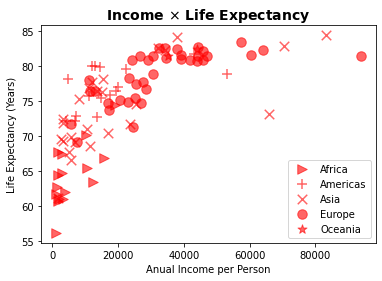

In [ ]:
markers = dict(zip(df.continent.unique(), ['>','+','x','o','*']))

for continent in  df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'], 
              df[ df['continent'] == continent ]['LifeExpect'] , 
              marker=markers[continent],
              s=90,
              c='red',
              label=continent,
              alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')
plt.legend()

plt.show()


## Adicionando Dimensões Contínuas e Gráficos de Bolha

Até aqui nossa adição de outras dimensões aos gráficos se limitou ao emprego de variáveis discretas, como a dimensão de `continent` que adicionamos nos gráficos anteriores. Diferentes tamanhos e cores dos pontos permitem adicionar também dimensões de uma variável quantitativa contínua. Neste caso, em geral, empregaremos círculos como marcadores e um gráfico de bolhas é um gráfico multivariável que adiciona uma dimensão quantitativa a um gráfico de dispersão associando a cada ponto uma área proporcional ou cor a quantidade representada. 

Podemos, por exemplo, empregar os tamanhos ou cores para adicionar as dimensões dos valores  `SchoolYears15_24` e `HappyIdx` aos gráficos de renda e expectativa de vida anteriores e, assim, explorar conjuntamente essas relações. 

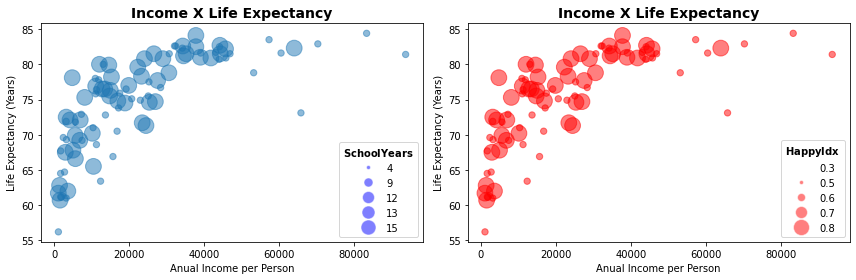

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.scatter(df['income_per_person'], 
              df['LifeExpect'] , 
              sizes=(40,250),
              s=df['SchoolYears15_24'],
              alpha=0.5)

plt.title('Income X Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

from matplotlib.lines import Line2D
legends = []
valores = np.round( df['SchoolYears15_24'].quantile([0,0.25,0.5,0.75,1]), 0).astype('int') 
for size in valores:
  legends.append( Line2D([0], [0], markerfacecolor='blue', marker='o', markersize=size, color='w', alpha=0.5) )

plt.legend( legends,  valores, title='$\\bf{School Years}$')

plt.subplot(1,2,2)
plt.scatter(df['income_per_person'], 
              df['LifeExpect'] , 
              sizes=(40,250),
              s=df['HappyIdx'],
              alpha=0.5,
              c='red')

plt.title('Income X Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

from matplotlib.lines import Line2D
legends = []
valores = np.round( df['HappyIdx'].quantile([0,0.25,0.5,0.75,1]), 1) 
for size, _ in enumerate(valores):
  legends.append( Line2D([0], [0], markerfacecolor='red', marker='o', markersize=size*4, color='w', alpha=0.5) )

plt.legend( legends,  valores, title='$\\bf{Happy Idx}$')

plt.tight_layout()
plt.show()

Talvez sem surpresa, você pode notar nos gráficos uma proximidade muito grande dos padrões de anos de escolaridade e do índice de felicidade dos países. É exatamente esse o objetivo desses gráficos: fornecer padrões que permitem encontrarmos relações entre os dados. Identificado uma realação de interesse podemos, em seguida, refinar e aprofundar nossa análise com outros gráficos sobre esses valores.


Sabendo da semelhança do padrão exibido pelas variáveis `SchoolYears15_24` e `HappyIdx` podemos, por exemplo, produzir um gráfico de bolhas com escalas diferentes para dimensões `SchoolYears15_24` e `HappyIdx` identificando as intersecções e confirmando a semelhança desses padrões ou, ainda, simplesmente construir um gráfico de pontos com as duas variáveis e observar a relação positiva que elas apresentam. 

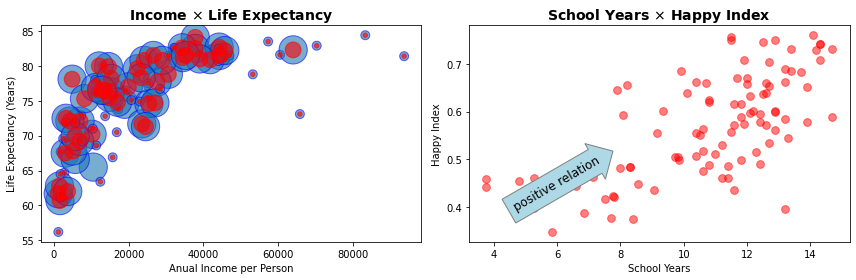

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.scatter(df['income_per_person'], 
              df['LifeExpect'] , 
              sizes=(80,800),
              s=df['SchoolYears15_24'],
              alpha=0.6,
              edgecolor='b')
plt.scatter(df['income_per_person'], 
              df['LifeExpect'] , 
              sizes=(20,250),
              s=df['HappyIdx'],
              alpha=0.6,
              edgecolor='r',
              c='red')

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.subplot(1,2,2)
plt.scatter(df['SchoolYears15_24'], 
              df['HappyIdx'],
              s=60,
              c='r',
              alpha=0.5)

plt.title('School Years $\\times$ Happy Index', fontsize=14, weight='bold')
plt.xlabel('School Years')
plt.ylabel('Happy Index')


bbox_props = dict(boxstyle="rarrow", fc='lightblue', ec='grey', lw=1)
t = plt.text(6, 0.45, 'positive relation', ha="center", va="center", rotation=30,
            size=12, bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

plt.tight_layout()
plt.show()

## Adicionando Dimensões Contínuas com Cores

Diferentes níveis de cores também podem ser empregados para exibir a dimensão de uma variável quantitativa contínua. 

Neste caso o mapeamento de cores pode ser feito diretamente com o parâmetro `cmap` associado a um esquema de cores de sua preferência. Como se tratam de  valores contínuos é mais útil empregarmos uma escala de cores no lugar de uma legenda de valores. No `Matplotlib` isso pode ser feito com o comando `colorbar()`. 

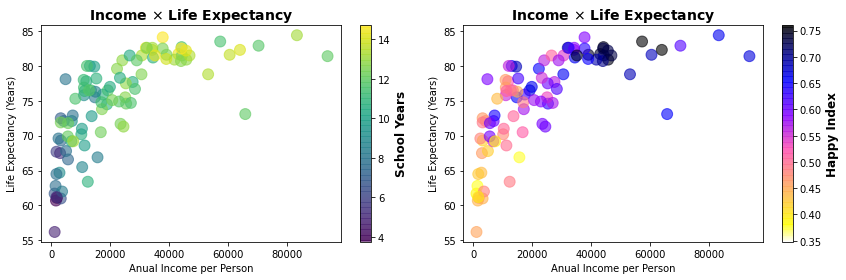

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.scatter(df['income_per_person'],df['LifeExpect'], alpha=0.6, s=120, c=df['SchoolYears15_24'], cmap=cm.viridis )

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

cbar = plt.colorbar()
cbar.set_label('School Years', fontsize=12, weight='bold')

plt.subplot(1,2,2)
plt.scatter(df['income_per_person'],df['LifeExpect'], alpha=0.6, s=120, c=df['HappyIdx'], cmap=cm.gnuplot2_r)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

cbar = plt.colorbar()
cbar.set_label('Happy Index', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

## Usando o `Seaborn`

Os mesmos gráficos podem ser produzidos com o pacote `Seaborn` de modo semelhante. Para associar o tamanho dos pontos a uma variável quantitativa você pode empregar os parâmetros `hue` e `size`. O parâmetro `sizes` (com 's' ao final!) indicará os diâmetros mínimo e máximo dos pontos. Você pode alterar o código a seguir e verificar que o resultado não será tão bom se empregar o parâmetro `size` sem empregar o parâmetro `hue`.

Para empregar uma escala de cores para nova dimensão de valores contínuos é necessário empregar alguns artifícios para exibir a barra de escala de valores e excluir a legenda automática do `Seaborn`. O artifício consiste em criar um `plot` nulo do `Matplotlib` com a barra de cores e a legenda é excluída em um comando separadamente.

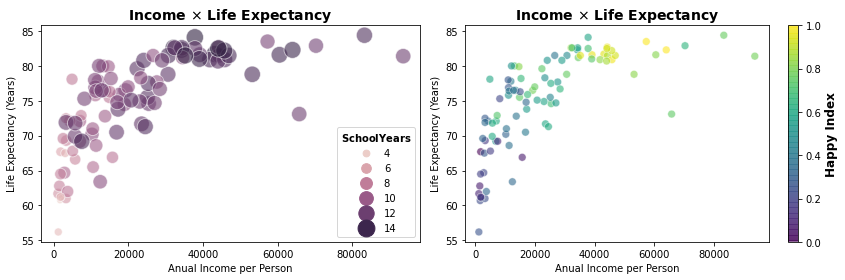

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
scatter= sns.scatterplot(x=df['income_per_person'], 
            y=df['LifeExpect'] ,
            hue=df['SchoolYears15_24'],
            sizes=(40,300),
            size=df['SchoolYears15_24'],
            alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend(title='$\\bf{School Years}$')

plt.subplot(1,2,2)
plt_colbar = plt.scatter([], [],
            s=60,
            alpha=0.6,
            cmap=cm.viridis)

scatter = sns.scatterplot(x=df['income_per_person'], 
            y=df['LifeExpect'] ,
            c=df['HappyIdx'],
            hue=df['HappyIdx'],
            palette=cm.viridis,
            s=60,
            alpha=0.6)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

cbar = plt.colorbar(plt_colbar)
cbar.set_label('Happy Index', fontsize=12, weight='bold')
scatter.get_legend().remove()

plt.tight_layout()
plt.show()



Ao final, o uso do `Matplotlib` ou do `Seaborn` para gráficos de dispersão não parecem apresentar muita diferença para construção de gráficos simples e, para dados multidimensionais, cada um apresenta uma dificuldade particular para o  customização final dos gráficos (as legendas, por exemplo). De qualquer modo  para gráficos multidimensionais mais exploratórios, se você não precisar ter controle de todos os elementos do gráfico, o `Seaborn` fornecerá uma interface mais simples e ágil de usar.  

## Linha de Ajuste

Você pode retornar ao capítulo de Evolução para verificar detalhes como adicionar linhas de tendências em gráficos de pontos. Lá aplicamos o mesmo procedimento que empregaremos aqui aplicando uma função de otimização para o ajuste de curvas do pacote `SciPy`. O que adicionamos aqui é um artifício bastante comum aplicado a uma série de dados populacionais como renda, mas também aplicável a dados de preços de imóveis, veículos etc. que apresentam uma distribuição exponencial. Relações lineares são sempre mais fáceis de serem empregadas e podemos empregar o artíficio de transformar uma distribuição exponencial aplicando uma transformação de $log( )$ para fornecer uma relação linear dos dados.

In [ ]:
# Produzindo o ajuste da curva
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*np.log(x) + b

coefs, covar = curve_fit(func, df['income_per_person'], df['LifeExpect'])

x = np.linspace(df['income_per_person'].min(), df['income_per_person'].max(), 100)
y = func(x,*coefs)

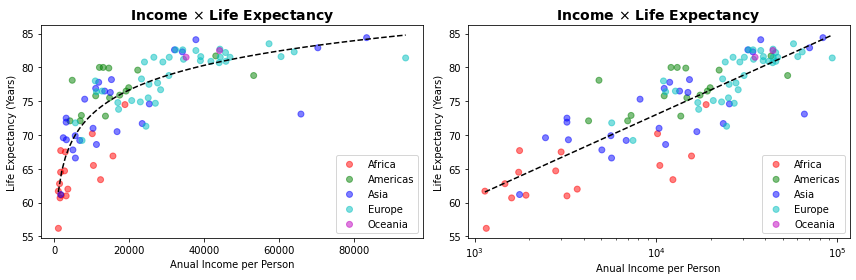

In [ ]:
plt.figure(figsize=(12, 4))
colors1 = dict(zip(df.continent.unique(), ['r','g','b','c','m']))

plt.subplot(1,2,1)
for continent in df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'], 
              df[ df['continent'] == continent ]['LifeExpect'] , 
              c=df[ df['continent'] == continent ]['continent'].map(colors1), 
              label=continent,
              alpha=0.5)

plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend()

plt.subplot(1,2,2)
for continent in df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['income_per_person'], 
              df[ df['continent'] == continent ]['LifeExpect'] , 
              c=df[ df['continent'] == continent ]['continent'].map(colors1), 
              label=continent,
              alpha=0.5)

plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

plt.xscale('log')

plt.title('Income $\\times$ Life Expectancy', fontsize=14, weight='bold')
plt.xlabel('Anual Income per Person')
plt.ylabel('Life Expectancy (Years)')

plt.legend(loc='lower right')


plt.tight_layout()
plt.show()

Você pode notar como o primeiro gráfico se ajusta a uma função logarítmica e, alterando o eixo $x$ para uma escala logarítmica, obtemos o ajuste linear. Veja os coeficientes de correlação obtidos em cada caso.

In [ ]:
from IPython.display import display, Math, Latex 
Math('\\bf Corr( LifeExpect , Income ) =' +  f'{np.corrcoef(df["income_per_person"],df["LifeExpect"])[0,1]:.3f}')  

<IPython.core.display.Math object>

In [ ]:
Math('\\bf Corr( LifeExpect , Income ) =' +  f'{np.corrcoef(np.log( df["income_per_person"] ),df["LifeExpect"])[0,1]:.3f}')  

<IPython.core.display.Math object>

## Correlogramas

Correlogramas nada mais são do que vários gráficos de pontos de diferentes pares de variáveis. Desse modo, você explora as relações dos dados analisando separadamente cada par de variáveis. É uma forma de evitarmos o *overplotting* e dividirmos o problema da análise de  relações em várias partes. 

Podemos fazer isso com o `Matplotlib`, mas havendo várias variáveis pode ser necessário fazer um laço de programa para produzir os diferentes gráficos de dispersão de cada par de variável (em geral empregamos somente as quantitativas, numéricas) e logo a seguir você verá um laço de programa como esse. Mas essa tarefa pode ser um tanto tediosa.

O `Seaborn` fornece uma função para exibir, em um único comando, os diferentes pares de variáveis e é, geralmente, a forma mais simples e empregada. Apenas para fins de apresentação no texto limitamos a quantidade de pares de variáveis a serem exploradas. De qualquer modo, embora possível, é recomendável evitar execuções do tipo `sns.pairs(df)` que exibirão *todas* as relações. Elas levarão muito tempo para serem processadas e, em muitos casos, produzem gráficos desnecessários (variáveis categóricas também serão incluídas neste caso).

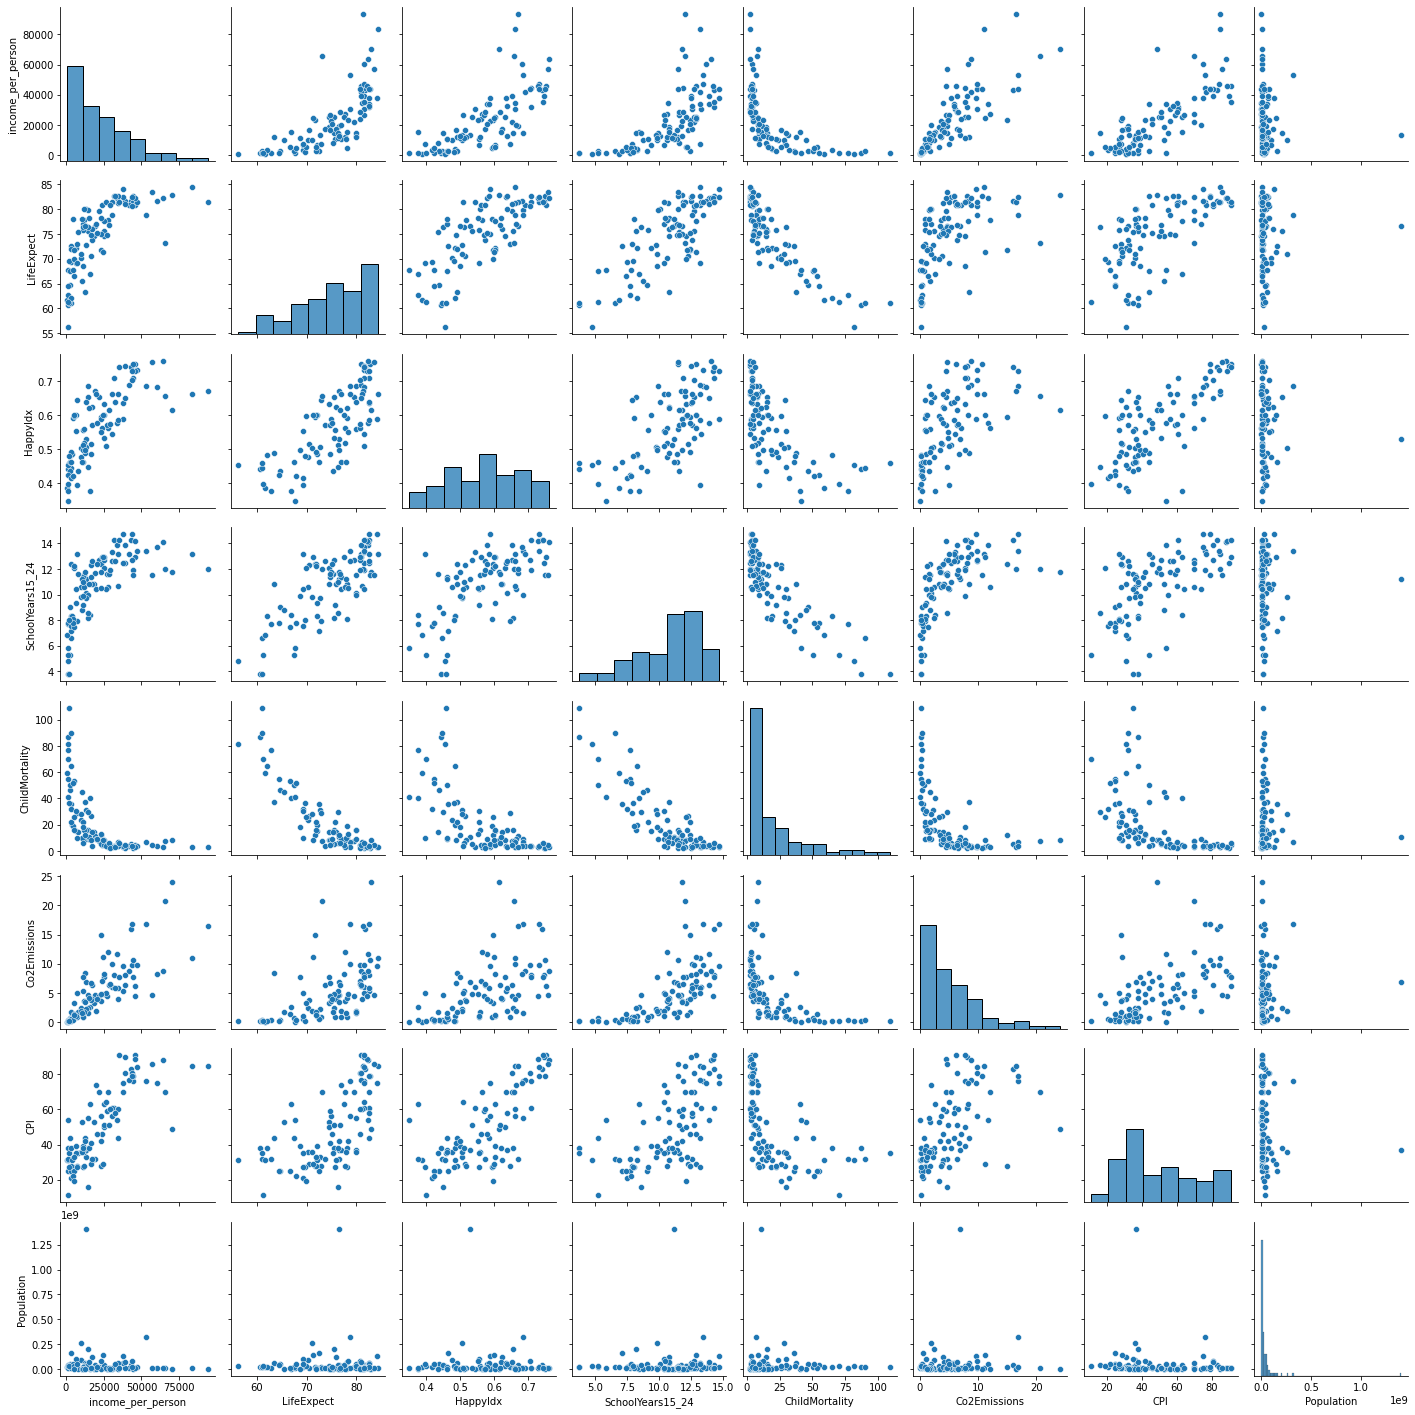

In [ ]:
sns.pairplot(df[['income_per_person', 'LifeExpect', 'HappyIdx','SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
            'CPI', 'Population']])
plt.show()

Observando o gráfico acima algumas relações se destacam por apresentar uma relação mais linear como  `LifeExpect` $\times$ `ChildMortality` e `SchoolYears15_24` $\times$ `ChildMortality`. 

De fato, essas são relações que apresentam um coeficiente de correlação bastante alto e podemos identificar essas correlações produzindo uma matriz de correlação desses pares de variáveis e identificando seus maiores valores. Fazemos isso a seguir.

In [ ]:
pd.options.display.max_rows = 999
df[['income_per_person',
       'LifeExpect', 'HappyIdx',
       'SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
       'CPI', 'Population']].corr()

income_per_person  LifeExpect  ...       CPI  Population
income_per_person           1.000000    0.710835  ...  0.805391   -0.052656
LifeExpect                  0.710835    1.000000  ...  0.651758    0.017118
HappyIdx                    0.727471    0.750452  ...  0.729569   -0.030911
SchoolYears15_24            0.652686    0.772257  ...  0.583404    0.023106
ChildMortality             -0.600019   -0.878321  ... -0.527718   -0.039804
Co2Emissions                0.796020    0.532751  ...  0.558390    0.059660
CPI                         0.805391    0.651758  ...  1.000000   -0.086626
Population                 -0.052656    0.017118  ... -0.086626    1.000000

[8 rows x 8 columns]

In [ ]:
df[['income_per_person',
       'LifeExpect', 'HappyIdx',
       'SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
       'CPI', 'Population']].corr().abs().unstack().drop_duplicates().sort_values(ascending=False).nlargest(5)

income_per_person  income_per_person    1.000000
LifeExpect         ChildMortality       0.878321
SchoolYears15_24   ChildMortality       0.851195
income_per_person  CPI                  0.805391
                   Co2Emissions         0.796020
dtype: float64

Com esses maiores valores de correlação, ou pelo correlograma, identificamos  os pares de variáveis de interesse e podemos aprofundar nossa análise, por exemplo, produzindo linhas de tendência para elas. 

Implementamos isso abaixo com um laço de programa de gráficos de pontos do `Matplotlib`, e algo semelhante pode ser facilmente adaptado para produzir com o `Matplotlib` um correlograma como fizemos com o `Seaborn`.

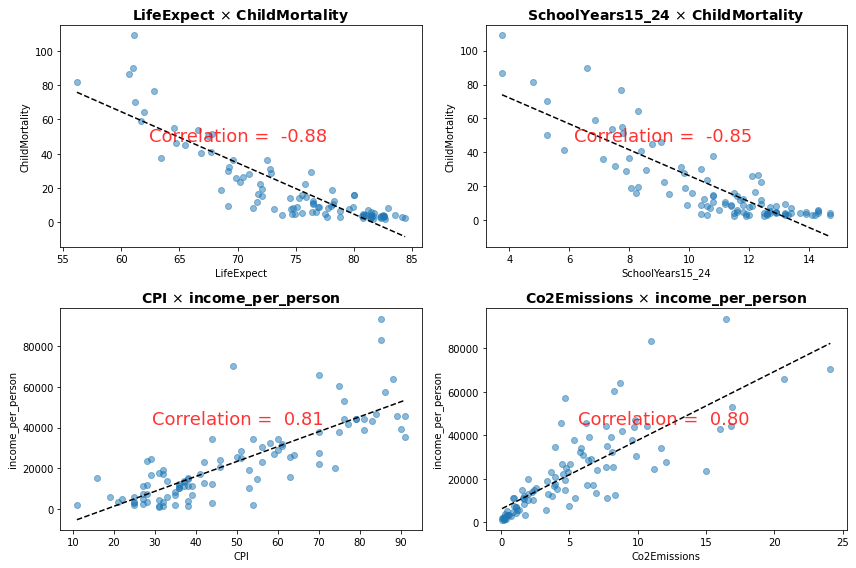

In [ ]:
plt.figure(figsize=(12, 8)) 

def linear(x, a, b):
    return a*x + b

for i, pairs in enumerate( [ ['LifeExpect','ChildMortality',],
                ['SchoolYears15_24','ChildMortality'],
                ['CPI','income_per_person'],
                ['Co2Emissions','income_per_person'] ] ): 
 
  coefs, covar = curve_fit(linear, df[pairs[0]], df[pairs[1]])
  x = np.linspace(df[pairs[0]].min(), df[pairs[0]].max(), 100)
  y = linear(x,*coefs)

  plt.subplot(2,2,i+1)
  plt.scatter(df[pairs[0]], df[pairs[1]], alpha=0.5)

  plt.plot(x,y,color='black', linestyle='dashed', lw=1.5)

  texto = f'Correlation =  {df[[pairs[0],pairs[1]]].corr().unstack()[1]:.2f} '
  plt.text(( plt.gca().get_xlim()[1] + plt.gca().get_xlim()[0])/2,
           ( plt.gca().get_ylim()[1] + plt.gca().get_ylim()[0])/2,
           texto, ha='center', va='center', fontsize=18, color='red', alpha=0.8)

  plt.title(pairs[0] + ' $\\times$ ' + pairs[1], fontsize=14, weight='bold')
  plt.xlabel(pairs[0])
  plt.ylabel(pairs[1])

plt.tight_layout()
plt.show()

É importante notar que, embora tenhamos explorado relações lineares dos dados, o correlograma não se limita a apresentar somente relações lineares e poderia ajudar a identificar muitos outros padrões de relacionamento entre os dados. 

## Mapas de Calor

Mapas de Calor ou *Heat Maps* permitem visualizar dados multivariados exibindo variáveis ​​discretas (categóricas ou numéricas) nas linhas e colunas de um conjunto retangular de células e uma dimensão quantitativa colorindo esses elementos. Os mapas de calor são ótimas representações para exibir variações de valores em várias variáveis e identificar grupos de dados que apresentam um mesmo padrão de valores. 

Um cuidado a ser tomado aqui é na escolha do esquema de cores a ser empregado. Caso você não opte pelo esquema padrão dê preferência aos esquemas cíclicos ou simplesmente sequenciais que permitem mais facilmente associar uma escala de cores a uma escala de valores. 

### Mapa de Correlação

Um caso especial muito comum de uso dos Mapas de Calor é para exibirmos uma matriz de correlação. Esse gráfico pode substituir o Correlograma para a identificação de correlações, isto é, relações lineares. Mas você deve lembrar que podem haver outras relações e, neste caso, o Correlograma é um instrumento de análise mais geral. 

O `Matplotlib` não possui nenhuma função específica para mapas de calor, mas podemos empregar a função de exibição de imagens `imshow()` para construir mapas de calor basta, para isso, passar para a função uma matriz de valores. Os rótulos nesse caso precisam ser inseridos manualmente.

O `Seaborn`, por outro lado, já tem uma função específica para mapas de calor e a função `heatmap` espera receber um `narray`, ou um  `DataFrame`,  empregando neste caso as informações de índice e coluna para rotular o gráfico.

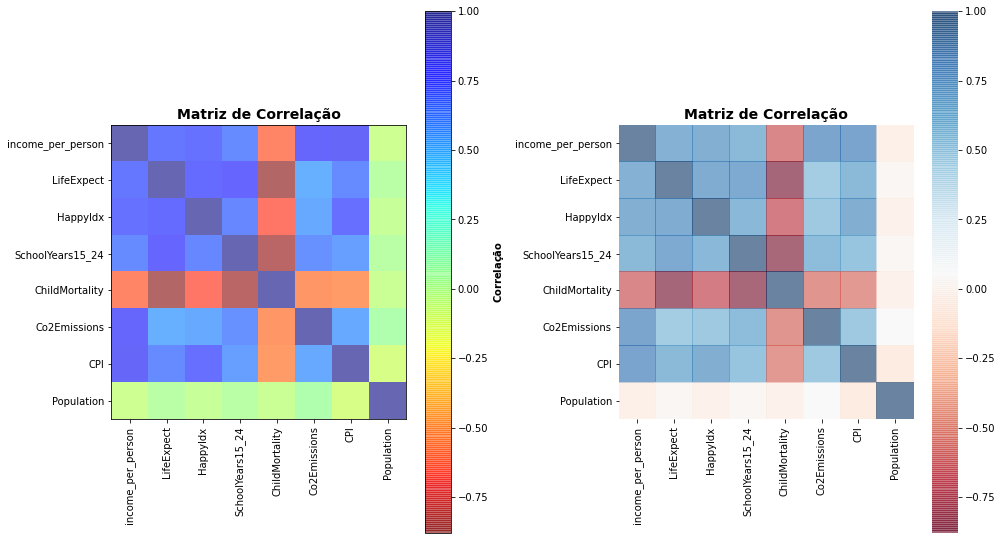

In [ ]:
plt.figure(figsize=(14,8))

matriz = df[['income_per_person',
       'LifeExpect', 'HappyIdx',
       'SchoolYears15_24', 'ChildMortality', 'Co2Emissions',
       'CPI', 'Population']].corr()

plt.subplot(1,2,1)
plt.imshow(matriz, cmap='jet_r', alpha=0.6)

plt.xticks(np.arange(len( matriz.columns)), matriz.columns.to_list(), rotation=90)
plt.yticks(np.arange(len( matriz.columns)), matriz.columns.to_list())

cbar = plt.colorbar()
cbar.set_label('$\\bf{Correlação}$')

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.subplot(1,2,2)
sns.heatmap(matriz, cmap='RdBu', square=True, alpha=0.6) 

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

Em quaisquer dos gráficos acima você pode indentificar, por exemplo, a alta correlação de `ChildMortality` com diversos outros indicadores, do mesmo modo que observamos antes no Correlograma.

### Variáveis Categóricas e uma Dimensão Quantitativa

Mas num caso mais geral o Mapa de Calor é a representação de uma matriz retangular e as linhas e colunas correspondem a valores discretos dos dados. Uma terceira variável quantitativa é representada pelas cor correspondente a cada posição dos dados (linha/coluna). Para exemplificar este caso vamos empregar o dataset `mpg` e representar a média dos valores de `mpg` ao longo dos anos por origem dos veículos. Neste exemplo vamos empregar apenas o `Seaborn`. Boa parte do trabalho para construir um Mapa de Calor está em criar a matriz de dados e, portanto, começamos por ela.

In [ ]:
mpg = sns.load_dataset("mpg")
mpg.head()

mpg  cylinders  displacement  ...  model_year  origin                       name
0  18.0          8         307.0  ...          70     usa  chevrolet chevelle malibu
1  15.0          8         350.0  ...          70     usa          buick skylark 320
2  18.0          8         318.0  ...          70     usa         plymouth satellite
3  16.0          8         304.0  ...          70     usa              amc rebel sst
4  17.0          8         302.0  ...          70     usa                ford torino

[5 rows x 9 columns]

As operações abaixo permitem criar uma matriz onde os valores de média de `mpg` são únicos para cada par `origin`/`model_year`, e serão respectivamente as linhas e colunas da nossa matriz. Fazemos essas operações em separado para que você possa entender os dados produzidos e que empregaremos no mapa de calor diretamente.

In [ ]:
mpg_group = pd.DataFrame(mpg.groupby(['origin', 'model_year']).mpg.mean()).reset_index()

In [ ]:
mpg_group.pivot('origin',	'model_year',	'mpg' )

model_year         70     71         72  ...         80         81         82
origin                                   ...                                 
europe      25.200000  28.75  22.000000  ...  37.288889  31.575000  40.000000
japan       25.500000  29.50  24.200000  ...  35.400000  32.958333  34.888889
usa         15.272727  18.10  16.277778  ...  25.914286  27.530769  29.450000

[3 rows x 13 columns]

Entendida essa construção dos valores podemos empregar a matriz diretamente na função de mapa de calor do `Seaborn`. 

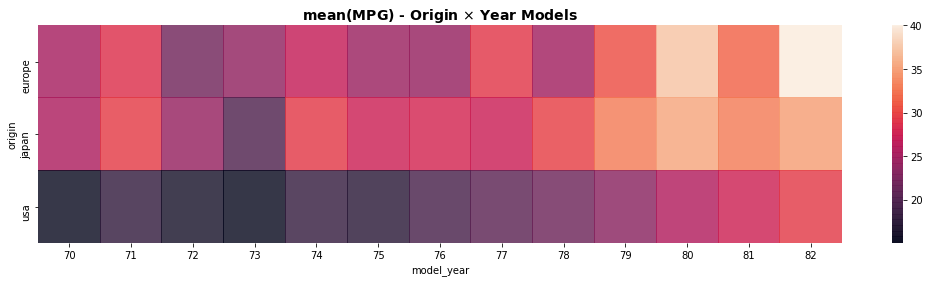

In [ ]:
plt.figure(figsize=(18,4))
          
sns.heatmap(mpg_group.pivot('origin',	'model_year',	'mpg' ), alpha=0.8)

plt.title('mean(MPG) - Origin $\\times$ Year Models', fontsize=14, weight='bold')
plt.show()

A representação ajuda, por exemplo, a identificar que os veículos se tornam mais econômicos ao longo dos anos (maiores valores de `mpg`). Em particular, a Europa lidera corrida por carros econômicos chegando a produzir veículos que fazem em média cerca de 40 mpg (parte superior direita do gráfico).

### Mapa de Calor e Várias Medidas Quantitativas

É menos comum, mas também podemos empregar váriaveis quantitativas nos eixos de um Mapa de Calor e isso pode ser útil em alguns casos como, por exemplo, para  identificar atributos com muitos valores ausentes em um conjunto de milhares de dados. 

O que podemos observar com esse tipo de gráfico é um pouco diferente dos gráficos anteriores. A primeira coisa que você precisa notar é que havendo várias variáveis quantitativas elas podem apresentar diferentes escalas de valores e, como só temos a dimensão cor para representar os valores, será necessário normalizar os dados e a representação dos valores será assim relativa. 

Abaixo você encontra um exemplo disso e, no primeiro gráfico, empregamos os valores sem normalização para que você entenda o que ocorre. Como existem muitos dados separamos somente os dados dos top 10 e low 10 países com base na renda per capta para examinarmos simultâeamente todas as variáveis quantitativas de cada país.

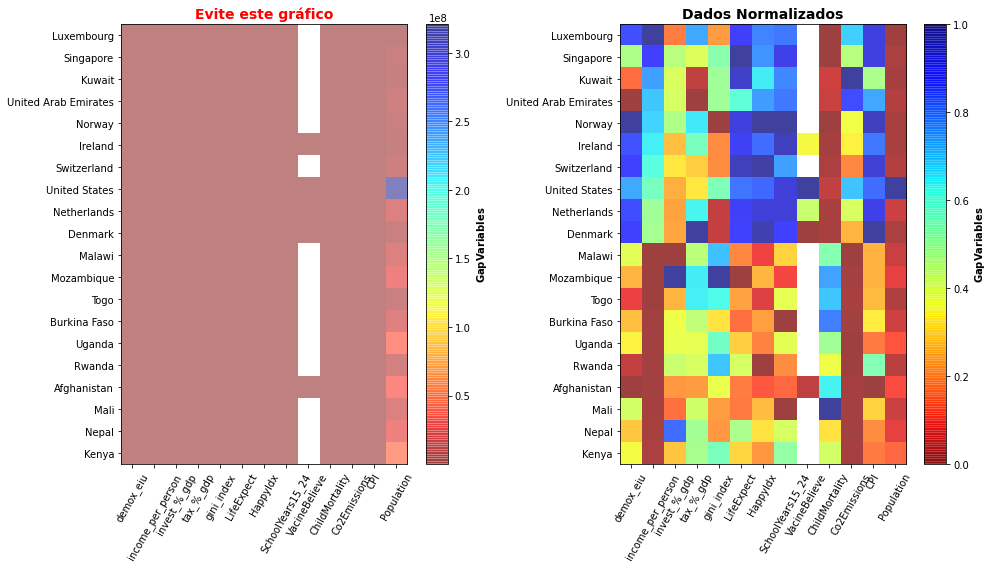

In [ ]:
dfTop10 = df.nlargest(10,columns='income_per_person')
dfLow10 = df.nsmallest(10,columns='income_per_person')

df10 = pd.concat([dfTop10,dfLow10])

matriz = df10.drop(columns=['continent', 'country', 'year', 'cod_continent'])
matriz_norm =(matriz-matriz.min())/(matriz.max()-matriz.min())
  
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.imshow(matriz, cmap='jet_r',alpha=0.5)
plt.yticks(np.arange(len(df10['country'])),df10['country'])
plt.xticks(np.arange(len(matriz.columns)),matriz.columns, rotation=60)
cbar = plt.colorbar()
cbar.set_label('$\\bf{Gap Variables}$')

plt.title('Evite este gráfico', fontsize=14, weight='bold', color='r')

plt.subplot(1,2,2)
plt.imshow(matriz_norm, cmap='jet_r',alpha=0.75)
plt.yticks(np.arange(len(df10['country'])),df10['country'])
plt.xticks(np.arange(len(matriz_norm.columns)),matriz_norm.columns, rotation=60)
cbar = plt.colorbar()
cbar.set_label('$\\bf{Gap Variables}$')

plt.title('Dados Normalizados', fontsize=14, weight='bold')


plt.tight_layout()
plt.show()



Os resultados talvez não supreendam você, mas o gráfico permite que você observe bastante claramente que o grupo dos países de maior renda apresenta valores bastante superiores de vários índices de desenvolvimento como o índice de felicidade, de expectativa de vida e de anos de escolaridade (valores em azul na parte superior do mapa). Permitem também ver que o grupo de menor renda apresenta níveis baixos de emissões de CO2 e que os países ricos tem o maior nível de CPI  (Corruption Perceptions Index). A linha branca que você encontra no gráfico também é uma informação útil e indica valores ausentes para `VacineBelieve` para uma série de países. Essa é uma forma rápida de mapearmos valores ausentes quando temos centenas de atributos e milhares de dados.  

## Análise de Componentes Principais

Criado por Karl Pearson (o mesmo estatístico do coeficiente de Pearson) o PCA é uma técnica estatística para redução de dimensionalidade dos dados. O PCA converte um conjunto de variáveis correlacionadas num conjunto de valores linearmente não correlacionados chamados de componentes principais. A ideia desse procedimento é que os componentes principais (de 1 até no máximo o número de variáveis consideradas) representam a variância dos dados em ordem decrescente e, assim, podemos empregar dois componentes principais, isto é, duas novas variáveis criadas a partir das variáveis originais, para exibir os dados no plano representando ainda uma grande parte de sua variância.

Para construirmos essa visualização vamos empregar a função PCA do `Scikit-Learn`. O PCA é sensível a normalização e precisamos primeiramente eliminar os valores ausentes e normalizar os dados. Vimos acima que temos um grande número valores ausentes para `VacineBelieve` e vamos então eliminar esse atributo. Sem prejuízo vamos excluir as demais linhas com valores nulos para gerar os componentes principais com as mesmas variáveis que empregamos no Correlograma antes. 



In [ ]:
print('Dados com Valores ausentes:', df.isnull().values.any())
df = df.drop(columns=['VacineBelieve'])
df = df.dropna().reset_index(drop=True)
print('Dados com Valores ausentes:', df.isnull().values.any())

Dados com Valores ausentes: True
Dados com Valores ausentes: False


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['income_per_person', 'LifeExpect', 'HappyIdx','SchoolYears15_24', 'ChildMortality', 'Co2Emissions', 'CPI', 'Population']]
features = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns = features)
X.head()

income_per_person  LifeExpect  HappyIdx  ...  Co2Emissions       CPI  Population
0          -0.378566   -1.239440 -1.850791  ...     -0.574424  0.642906   -0.308834
1          -1.104401   -2.172864 -1.226559  ...     -1.061338 -0.533444   -0.202322
2          -1.020492   -2.127698 -1.198185  ...     -1.015677 -0.815768   -0.168329
3          -0.661693   -0.742618 -0.904986  ...     -0.613328 -0.627552    0.292911
4          -1.042628   -1.570655 -1.283308  ...     -1.028782 -1.145146   -0.003695

[5 rows x 8 columns]

Empregamos então a função `PCA` do `Scikit-Learn` para gerar os componentes principais.

In [ ]:
pca = PCA(n_components=2)
PC2 = pca.fit_transform(X)

PC2 = pd.DataFrame(PC2, columns = ['PComp1','PComp2']) 


In [ ]:
df = pd.concat([df,PC2],axis=1)
df.head()

continent        country  year  ...  cod_continent    PComp1    PComp2
0    Africa       Botswana  2015  ...              0  2.044587 -0.613808
1    Africa   Burkina Faso  2015  ...              0  4.537997 -0.822175
2    Africa  Cote d'Ivoire  2015  ...              0  4.185610 -0.644831
3    Africa          Egypt  2015  ...              0  1.455138  0.401299
4    Africa          Kenya  2015  ...              0  3.022230 -0.005218

[5 rows x 18 columns]

Esses dois componentes compreendem respectivamente 0.63 e 0.12 da variância dos dados e, portanto, podemos contar que uma representação com apenas essas duas dimensões estará representando 0.75 (75%) da variância dos dados, um valor bastante bom para termos uma representação de dados em duas dimensões uma vez que não podemos representar visualmente as 8 dimensões dos dados.


In [ ]:
pca.explained_variance_ratio_

array([0.63095752, 0.12962208])

Podemos agora exibir esses dados em um gráfico de pontos e rotular os dados com cores, por exemplo, com os respectivos continentes dos pontos.

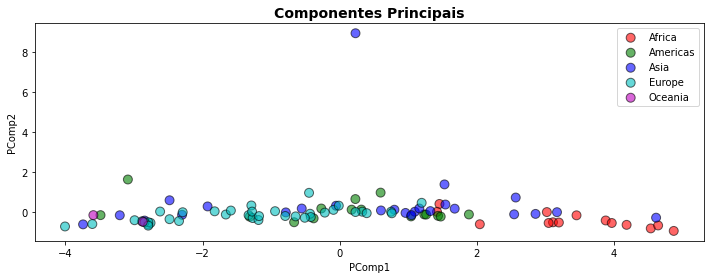

In [ ]:
plt.figure(figsize=(12,4))
colors1 = dict(zip(df.continent.unique(), ['r','g','b','c','m']))

for continent in df.continent.unique():
  plt.scatter(df[ df['continent'] == continent ]['PComp1'], 
              df[ df['continent'] == continent ]['PComp2'] , 
              c=df[ df['continent'] == continent ]['continent'].map(colors1), 
              label=continent,
              s = 80,
              edgecolor='k',
              alpha=0.6)

plt.title('Componentes Principais', fontsize=14, weight='bold')
plt.xlabel('PComp1')
plt.ylabel('PComp2')

plt.legend()
plt.show()

O gráfico exibe algumas semelhanças e diferenças importantes dos continentes. A Europa e América, quando comparadas com a África estão claramente em posições opostas do gráfico representando suas diferenças nos 8 indicadores (as variáveis originais) de desenvolvimento que empregamos. A Ásia, como sabemos, apresenta países em várias condições diferentes, indo do mais alto aos níveis mais baixos de desenvolvimento e isso também aparece representado no gráfico.  

A análise de componentes principais, e a análise de fatores, são técnicas estatísticas bastante elaboradas e que envolvem muito mais elementos do que vimos aqui, mas para o propósito de reduzir dimensões para a visualização de  dados esta introdução é bastante suficiente, e com essas ferramentas e as que vimos nos demais capítulos você estará bastante apto a encontrar e analisar várias possíveis relações entre os dados.